In [1]:

!pip install scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from collections import Counter

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
feature_names = [
    "letter", "x_box", "y_box", "width", "height", "onpix", "x_bar", "y_bar", "x2bar", "y2bar",
    "xybar", "x2ybr", "xy2br", "x_edge", "xegvy", "y_edge", "yegvx"
]
df = pd.read_csv(data_url, header=None, names=feature_names)

df['letter'] = df['letter'].apply(lambda char: ord(char) - ord('A'))
df_sample = df.sample(n=5000, random_state=42).reset_index(drop=True)

print("Data Summary:")
print(df_sample.describe())
print("\nClass Distribution:")
print(df_sample['letter'].value_counts())


Data Summary:
            letter       x_box        y_box        width       height  \
count  5000.000000  5000.00000  5000.000000  5000.000000  5000.000000   
mean     12.696800     4.01340     6.986000     5.119200     5.338600   
std       7.477329     1.91707     3.299149     2.009826     2.235207   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%       6.000000     3.00000     5.000000     4.000000     4.000000   
50%      13.000000     4.00000     7.000000     5.000000     6.000000   
75%      19.000000     5.00000     9.000000     6.000000     7.000000   
max      25.000000    13.00000    15.000000    13.000000    15.000000   

             onpix        x_bar        y_bar        x2bar        y2bar  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      3.494600     6.894400     7.505000     4.584400     5.188400   
std       2.185527     2.029895     2.323759     2.665839     2.344612   
min       0.000000     0.000000 

In [2]:
kernels = ['linear', 'rbf']
C_values = np.linspace(0.1, 10, 20)
gamma_values = ['scale', 'auto']
split_results = []
convergence_histories = []

# Performing 5 different random 70-30 train-test splits
for split_idx in range(5):
    # Create a random train-test split
    X_tr, X_te, y_tr, y_te = train_test_split(
        df_sample.drop('letter', axis=1),
        df_sample['letter'],
        test_size=0.3,
        random_state=split_idx
    )
    
    max_acc = 0
    optimal_params = None
    accuracy_track = []
    
    # 50 random combinations of SVM parameters
    for iter_no in range(50):
        kernel_choice = np.random.choice(kernels)
        C_choice = np.random.choice(C_values)
        gamma_choice = np.random.choice(gamma_values)
        
        # Initialize and train the SVM classifier
        svm_model = SVC(kernel=kernel_choice, C=C_choice, gamma=gamma_choice)
        svm_model.fit(X_tr, y_tr)
        
        # Make predictions and calculate accuracy
        y_predicted = svm_model.predict(X_te)
        acc_score = accuracy_score(y_te, y_predicted)
        accuracy_track.append(acc_score)
        
        # Updating best accuracy and parameters if current is better
        if acc_score > max_acc:
            max_acc = acc_score
            optimal_params = {'kernel': kernel_choice, 'C': C_choice, 'gamma': gamma_choice}
    
    # Storing results for this split
    split_results.append({
        'Sample': f"S{split_idx+1}",
        'Best Accuracy': max_acc,
        'Best SVM Parameters': optimal_params
    })
    convergence_histories.append(accuracy_track)

# Creating a DataFrame of the results and display
final_results_df = pd.DataFrame(split_results)
print("\nFinal Result Table:")
print(final_results_df)



Final Result Table:
  Sample  Best Accuracy                                Best SVM Parameters
0     S1       0.925333  {'kernel': 'rbf', 'C': 6.352631578947369, 'gam...
1     S2       0.930000  {'kernel': 'rbf', 'C': 8.436842105263159, 'gam...
2     S3       0.943333  {'kernel': 'rbf', 'C': 4.268421052631579, 'gam...
3     S4       0.922000     {'kernel': 'rbf', 'C': 10.0, 'gamma': 'scale'}
4     S5       0.941333  {'kernel': 'rbf', 'C': 2.18421052631579, 'gamm...


In [3]:
# Saving the results to a CSV file
final_results_df.to_csv('svm_results.csv', index=False)

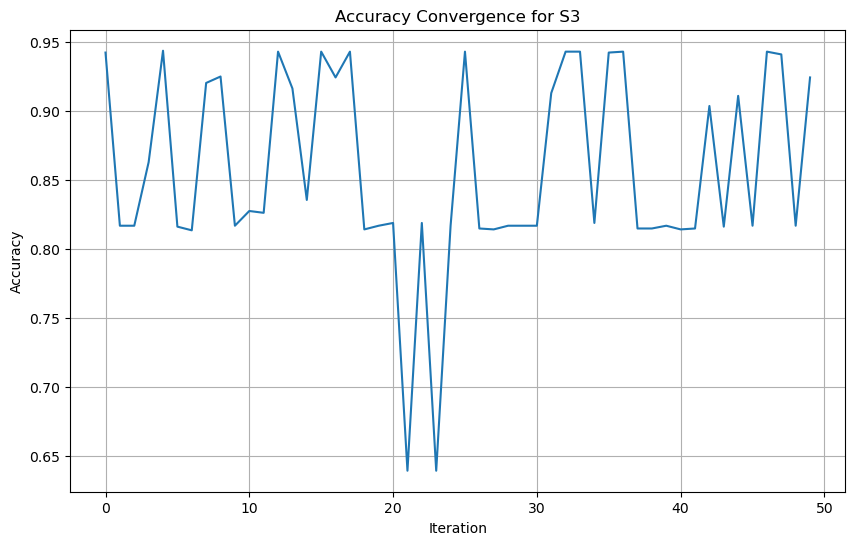

In [4]:
# Plot the accuracy convergence for the best-performing sample
best_split_idx = final_results_df['Best Accuracy'].idxmax()
plt.figure(figsize=(10, 6))
plt.plot(convergence_histories[best_split_idx])
plt.title(f'Accuracy Convergence for {final_results_df.loc[best_split_idx, "Sample"]}')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('convergence_plot.png')
plt.show()
